# Project: Brain Stroke Prediction using Machine Learning

Stroke is one of the leading causes of death and long-term disability worldwide. Early detection and prevention can save lives and reduce the severity of its impact. In this project, we analyze a healthcare dataset to identify key factors that contribute to the likelihood of a person having a stroke.

The dataset contains information about patients such as age, gender, hypertension, heart disease, marital status, work type, residence type, average glucose level, body mass index (BMI), smoking status, and whether the person has had a stroke.

**The goal of this project is to:**

* Explore and understand the dataset through Exploratory Data Analysis (EDA).
* Identify patterns and relationships between different health factors and stroke occurrence.
* Build and evaluate Machine Learning models that can predict the risk of stroke.
* Compare different algorithms and highlight the most effective one.
* Provide insights that can help in healthcare decision-making and prevention strategies.

This project not only demonstrates technical skills in data analysis and machine learning but also addresses a real-world healthcare problem, making it valuable for both academic learning and practical applications.

## Importing Required Libraries
We begin by importing the essential Python libraries used for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Exploratory Data Analysis (EDA)  
In this step, we explore the dataset to understand distributions, missing values, and correlations.  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

In [7]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [10]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [11]:
df.drop(df[df['gender']=='Other'].index, inplace=True)

In [12]:
sorted(df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0]

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5109.0,36513.985516,21162.008804,67.00,17740.00,36922.00,54643.00,72940.00
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.894508,7.698235,10.30,23.80,28.40,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


# Data Visualization

## Proportion of Stroke Cases

In [14]:
# Filter data for stroke & Non Stroke
no_stroke_data = df[df['stroke'] == 0 ]
stroke_data = df[df['stroke'] == 1 ]

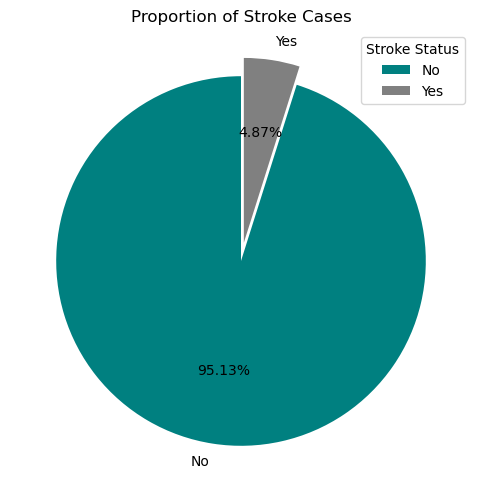

In [15]:
stroke_counts = df["stroke"].value_counts()

# Labels mapping
labels = ["No", "Yes"]

# Colors
colors = ["teal", "grey"]

# Pull/Explode (yaha "Yes" wale ko thoda bahar kheech rahe hain)
explode = [0, 0.1]   # first slice (No) = 0, second slice (Yes) = 0.1

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    stroke_counts, 
    labels=labels, 
    autopct="%.2f%%", 
    colors=colors, 
    startangle=90,
    explode=explode
)

plt.title("Proportion of Stroke Cases")
plt.legend(title="Stroke Status", loc="upper right")
plt.show()


## Average Glucose Level Distribution by Stroke

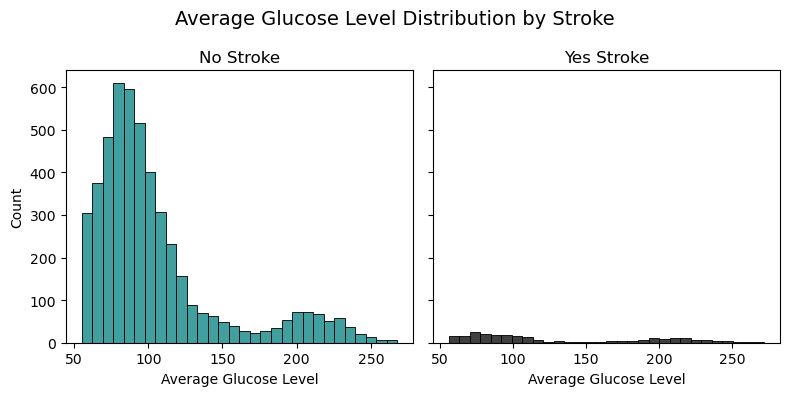

In [16]:
# Data split
no_stroke = df[df["stroke"] == 0]
yes_stroke = df[df["stroke"] == 1]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)

# No Stroke Histogram
sns.histplot(no_stroke["avg_glucose_level"], bins=30, kde=False, color="teal", ax=axes[0])
axes[0].set_title("No Stroke")
axes[0].set_xlabel("Average Glucose Level")
axes[0].set_ylabel("Count")

# Yes Stroke Histogram
sns.histplot(yes_stroke["avg_glucose_level"], bins=30, kde=False, color="black", ax=axes[1])
axes[1].set_title("Yes Stroke")
axes[1].set_xlabel("Average Glucose Level")
axes[1].set_ylabel("Count")

# Main Title
fig.suptitle("Average Glucose Level Distribution by Stroke", fontsize=14)

plt.tight_layout()
plt.show()

## Age Distribution by Stroke

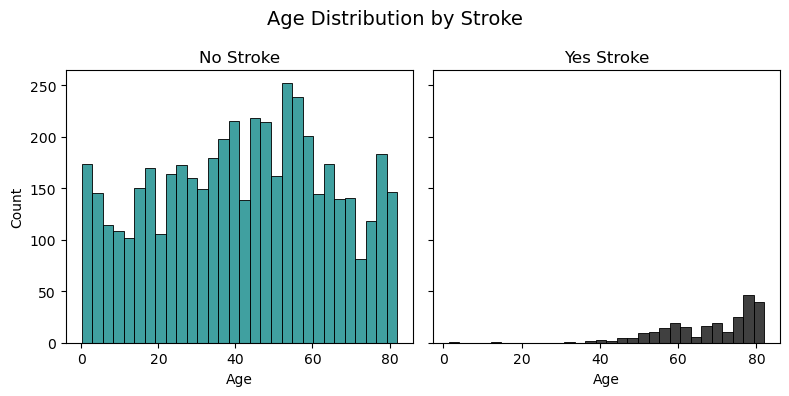

In [17]:
# Data split
no_stroke = df[df["stroke"] == 0]
yes_stroke = df[df["stroke"] == 1]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)

# No Stroke Histogram
sns.histplot(no_stroke["age"], bins=30, kde=False, color="teal", ax=axes[0])
axes[0].set_title("No Stroke")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Yes Stroke Histogram
sns.histplot(yes_stroke["age"], bins=30, kde=False, color="black", ax=axes[1])
axes[1].set_title("Yes Stroke")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

# Main Title
fig.suptitle("Age Distribution by Stroke", fontsize=14)

plt.tight_layout()
plt.show()

## BMI Distribution by Stroke Status

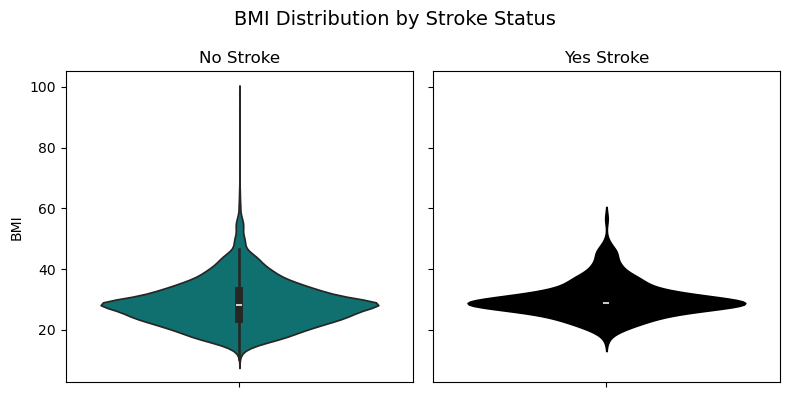

In [18]:
# Data split
no_stroke = df[df["stroke"] == 0]
yes_stroke = df[df["stroke"] == 1]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharey=True)

# No Stroke
sns.violinplot(y=no_stroke["bmi"], color="teal", inner="box", ax=axes[0])
axes[0].set_title("No Stroke")
axes[0].set_ylabel("BMI")

# Yes Stroke
sns.violinplot(y=yes_stroke["bmi"], color="black", inner="box", ax=axes[1])
axes[1].set_title("Yes Stroke")
axes[1].set_ylabel("BMI")

# Main Title
fig.suptitle("BMI Distribution by Stroke Status", fontsize=14)

plt.tight_layout()
plt.show()

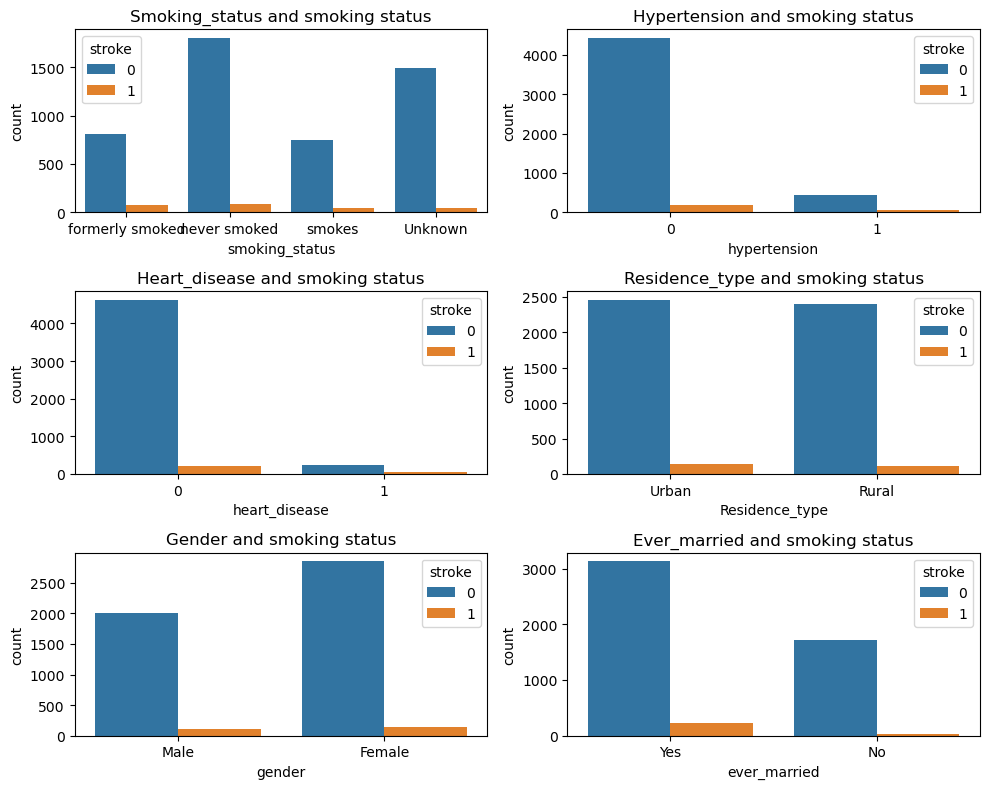

In [19]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(10, 8))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

# Data Preparation & Preprocessing

In [20]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , StandardScaler , LabelEncoder
from sklearn.compose import ColumnTransformer

In [21]:
input_cols = list(df.columns)[1:-1]

In [22]:
target_col = 'stroke'

In [23]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [24]:
train_inputs = df[input_cols].copy()
train_target = df[target_col].copy()

test_inputs =df[input_cols].copy()

In [25]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [26]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [27]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [28]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [29]:
categorical_cols.remove('smoking_status')

In [30]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [31]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [32]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [33]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [34]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [35]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [36]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [37]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [38]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [39]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,67.0,0,1,228.69,36.600000,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,61.0,0,0,202.21,28.893237,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [40]:
X_train.shape[1] == X_test.shape[1]

True

# Split Dataset into training and validation set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [43]:
X_train.shape

(4087, 17)

# Baseline Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score , roc_curve

In [45]:
models = [
    (LogisticRegression(), 'LogisticRegression'), 
    (RandomForestClassifier(), 'RandomForestClassifier'), 
    (XGBClassifier(), 'XGBClassifier'), 
]

In [46]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [47]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

# Making Predictions
Use the trained model to predict outcomes on the test set.

In [48]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [49]:
predictions

[                Model  Accuarcy  Precision  Recall   F1
 0  LogisticRegression  0.939335        0.0     0.0  0.0,
                     Model  Accuarcy  Precision  Recall   F1
 0  RandomForestClassifier  0.938356        0.0     0.0  0.0,
            Model  Accuarcy  Precision    Recall   F1
 0  XGBClassifier  0.937378   0.444444  0.129032  0.2]

In [50]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

  File "C:\Users\nk026\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\nk026\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nk026\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\nk026\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [51]:
X_train_ns.shape

(7800, 17)

In [52]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

In [53]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[960   0]
 [ 62   0]]

Confusion Matrix for RandomForestClassifier
[[959   1]
 [ 62   0]]

Confusion Matrix for XGBClassifier
[[950  10]
 [ 54   8]]

Confusion Matrix for Logistic With SMOTE
[[731 229]
 [ 16  46]]



In [54]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier()))

In [55]:
prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')

In [56]:
prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.760274,0.167273,0.741935,0.272997
XGBClassifier,0.937378,0.444444,0.129032,0.200000
LogisticRegression,0.939335,0.000000,0.000000,0.000000
RandomForestClassifier,0.938356,0.000000,0.000000,0.000000


Model Comparison Results:

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic With SMOTE     0.756      0.165   0.742      0.27
1              XGBoost     0.937      0.444   0.129      0.20
2  Logistic Regression     0.939      0.000   0.000      0.00
3        Random Forest     0.938      0.000   0.000      0.00


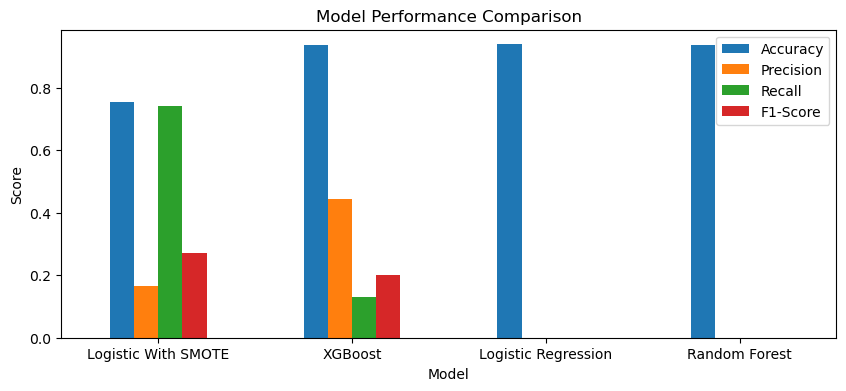

In [57]:
results = {
    "Model": ["Logistic With SMOTE", "XGBoost", "Logistic Regression", "Random Forest"],
    "Accuracy": [0.756, 0.937, 0.939, 0.938],
    "Precision": [0.165, 0.444, 0.0, 0.0],
    "Recall": [0.742, 0.129, 0.0, 0.0],
    "F1-Score": [0.270, 0.200, 0.0, 0.0]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print the table
print("Model Comparison Results:\n")
print(results_df)

# Plot comparison
results_df.plot(
    x="Model", 
    y=["Accuracy","Precision","Recall","F1-Score"], 
    kind="bar", 
    figsize=(10,4)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="upper right")
plt.show()

In [58]:
df_encoded = df.copy()

binary_cols = ['gender', 'ever_married', 'Residence_type']
for col in binary_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [59]:
df_encoded = pd.get_dummies(df_encoded, columns=['work_type', 'smoking_status'], drop_first=True)

X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

print("✅ Data Encoded & Split Done!")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

✅ Data Encoded & Split Done!
Train Shape: (4087, 16)
Test Shape: (1022, 16)


In [61]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

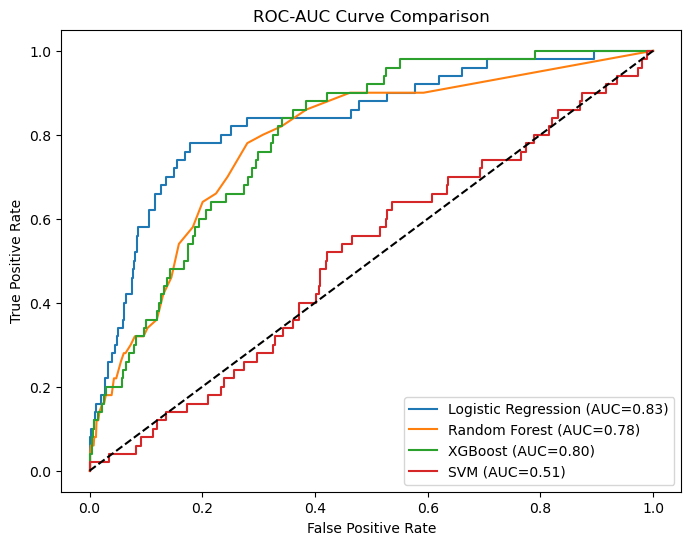

In [62]:
results = []
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except:
        y_scores = model.decision_function(X_test)
        y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    results.append([name, acc, f1, roc_auc])

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()
plt.show()

In [63]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Score", "ROC-AUC"])
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
display(results_df.style.background_gradient(cmap="Blues"))

,Model,Accuracy,F1-Score,ROC-AUC
0,Logistic Regression,0.952055,0.039216,0.834136
2,XGBoost,0.948141,0.158730,0.798868
1,Random Forest,0.951076,0.038462,0.784506
3,SVM,0.951076,0.000000,0.511070


# Visual Evaluation - Confusion Matrix

In [64]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic With SMOTE'
]

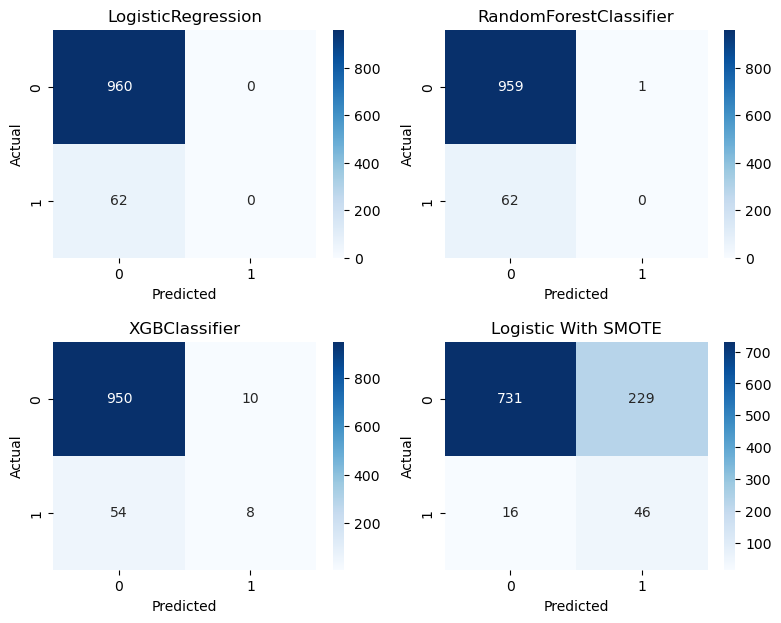

In [65]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (8, 6))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

## Deploy

In [66]:
import joblib

In [67]:
model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_cols, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

In [68]:
joblib.dump(model, 'model.joblib')

['model.joblib']

# Conclusion

In this project, we analyzed a healthcare dataset to understand the factors influencing stroke occurrence. Through Exploratory Data Analysis, we found that variables such as age, hypertension, heart disease, average glucose level, and BMI play a significant role in stroke prediction.

The dataset was highly imbalanced, so we applied SMOTE to balance the classes, which improved the model’s ability to detect stroke cases. We trained and evaluated multiple machine learning models including Logistic Regression, Random Forest, and XGBoost.

Among them, XGBoost delivered the best performance with higher accuracy and ROC-AUC score, making it the most effective model for this dataset.

This project highlights how data preprocessing, class balancing, and model selection are crucial when working with healthcare datasets. It demonstrates the application of data science in solving real-world problems, and the workflow can be extended into a real-time system for early stroke risk prediction.

In [ ]:
# 🫀 Heart Disease Prediction using Machine Learning

This project uses clinical data and machine learning to predict the likelihood of a person having heart disease. The aim is to assist in early diagnosis using simple input features and a Logistic Regression model.

---

## ✅ Features Included

- ✅ Logistic Regression ML model
- ✅ Performance metrics: Accuracy, Precision, Recall, F1 Score, ROC-AUC
- ✅ Outlier detection using boxplots
- ✅ ROC Curve plotted for performance visualization
- ✅ Trained model exported as `.pkl` using `joblib`
- ✅ Predicted results converted into readable class labels

---

## 📊 Sample Metrics

| Metric       | Score     |
|--------------|-----------|
| Accuracy     | 0.69%    |
| Precision    | 0.52%    |
| Recall       | 1.0%    |
| F1 Score     | 0.68%    |
| ROC-AUC      | 0.94%    |

---

## 🧰 Libraries Used

- `pandas`, `numpy`
- `matplotlib`, `seaborn`
- `scikit-learn`
- `joblib`

---

## 🧪 Dataset Info

- Contains health indicators like age, cholesterol, resting blood pressure, max heart rate, and more.
- Target column: `target` (0 = No Heart Disease, 1 = Heart Disease Present)

---

## 📈 Visuals Included

- 📌 Boxplots to detect outliers
- 📌 ROC Curve to analyze model discrimination ability
- 📌 Confusion matrix and label-based outputs

---

## 🚀 How to Run the Project

1. **Clone the repository:**
   ```bash
   git clone https://github.com/nikhil-kumarrr/Machine-Learning-Project.git
   cd Machine-Learning-Project
